In [3]:
from dptb.postprocess.bandstructure.band import Band
from dptb.nn.nnsk import NNSK
from dptb.utils.tools import j_loader
from dptb.nn.build import build_model
import os

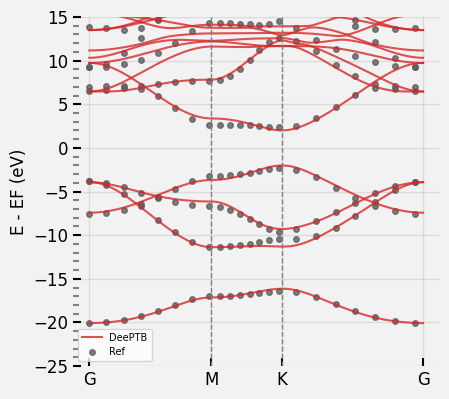

In [4]:

model = build_model(checkpoint="./ref_ckpts/condband/checkpoint/nnsk.ep500.pth")
jdata = j_loader("./run/band.json")
results_path = "./band_plot"
kpath_kwargs = jdata["task_options"]
stru_data = "./data/struct.vasp"
AtomicData_options = {"r_max": 5.0, "oer_max":1.6, "pbc": True}

bcal = Band(model=model, 
            use_gui=False, 
            results_path=results_path, 
            device=model.device)
bcal.get_bands(data=stru_data, 
               kpath_kwargs=kpath_kwargs, 
               AtomicData_options=AtomicData_options)
bcal.band_plot(ref_band = kpath_kwargs["ref_band"],
               E_fermi = kpath_kwargs["E_fermi"],
               emin = kpath_kwargs["emin"],
               emax = kpath_kwargs["emax"])